In [2]:
## Decision Tree Demo 1
## Data using the famous IRIS data set (for sake of comparisons)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data
dfRaw = pd.read_csv('data/iris.csv')
# display raw data
print(dfRaw)
#select all columns except 'Id'
dfRaw = dfRaw.loc[:, dfRaw.columns!='Id']


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


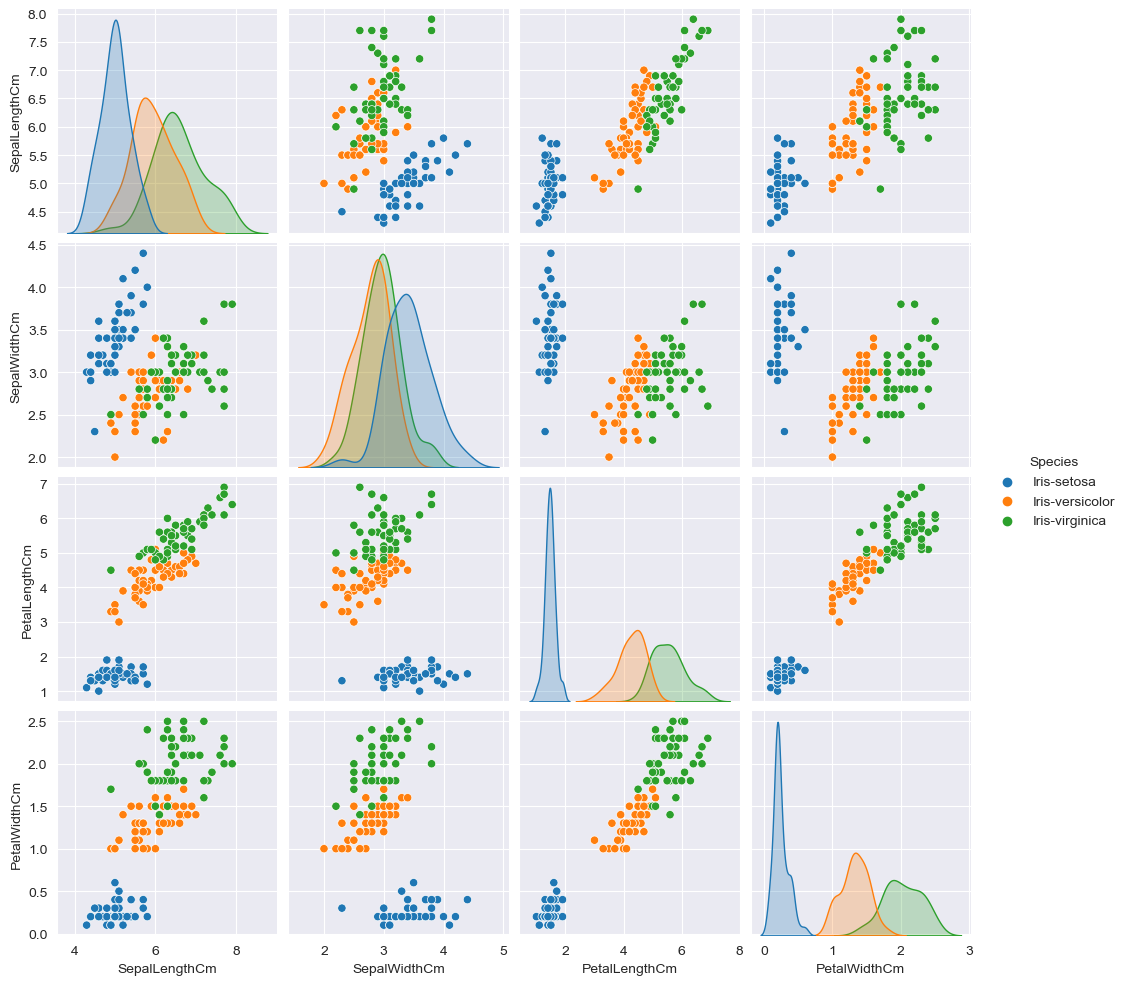

In [3]:
#Exploratory data analysis
# numerical statistics of numerical values in the dataset
display(round(dfRaw.describe(),1))
dfRaw.info()
sns.pairplot(dfRaw, hue = 'Species')

In [9]:
#Split the data set into training data and test data
from sklearn.model_selection import train_test_split
x = dfRaw.drop('Species', axis = 1)
y = dfRaw['Species']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.2)

In [5]:
#Train the decision tree model
from sklearn.tree import DecisionTreeClassifier
# For the sake of the demo we lock the random seed
model = DecisionTreeClassifier(random_state=1234) 
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [6]:
predictions

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

[[2 1 3]
 [4 3 4]
 [8 3 2]]
                 precision    recall  f1-score   support

    Iris-setosa       0.14      0.33      0.20         6
Iris-versicolor       0.43      0.27      0.33        11
 Iris-virginica       0.22      0.15      0.18        13

       accuracy                           0.23        30
      macro avg       0.26      0.25      0.24        30
   weighted avg       0.28      0.23      0.24        30



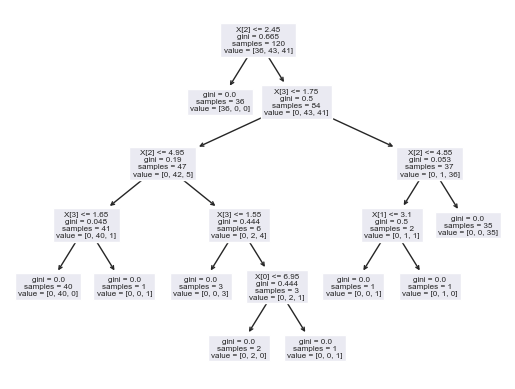

In [12]:
## Measure the performance of the decision tree model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Display the Confusion matrix
print(confusion_matrix(y_test_data, predictions))

# See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test_data, predictions))

from sklearn import tree
tree.plot_tree(model)
plt.show()

In [8]:
# Same confusion matrix, but much more informative and better looking ;)
pd.crosstab(y_test_data, predictions, rownames=['Actual'], colnames=['Predicted'])

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,14,0,0
Iris-versicolor,0,7,0
Iris-virginica,0,0,9
